In [1]:
# ! pip install pandas-profiling[notebook]

# EDA

I will follow the IBM Garage Method for Data Science approach to solve the suggested task of <font color="red">building a model to predict if an applicant is 'good' or 'bad' client, the definition of 'good' or 'bad' is not given</font>. The model will be developed in a local Jupyter Notebook for simplicity and later transferred to an IBM Data Platform notebook to train it and serialize it. Finally, I will deploy the model in the Google Cloud ML managed service.  

## Settings

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import helpers.settings as sts
sts.print_settings(sts)

BEST_ESTIMATOR_FILENAME : best_estimator_0.0.1.pkl
DATASET_TRAIN_FILENAME : dataset_train.parquet
DATASET_VALIDATION_FILENAME : dataset_validation.parquet
ETL_VERSION : 0.0.1
MODEL_FILENAME : model.pkl
MODEL_VERSION : 0.0.1
PREPROCESSOR_FILENAME : preprocessor_0.0.1.pkl
TRAINED_BEST_ESTIMATOR_FILENAME : trained_best_estimator_0.0.1.pkl
color : <class 'helpers.settings.color'>
print_settings : <function print_settings at 0x7fe19a9b0ca0>



## Imports

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport

## Load datasets

In [6]:
df = pd.read_parquet(f"data/{sts.DATASET_TRAIN_FILENAME}")

## Applications

In [7]:
df.head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           F            N               Y             0          135000.0   
1           F            N               N             0          157500.0   
2           F            Y               Y             0          675000.0   
3           F            Y               Y             2          112500.0   
4           F            N               Y             0          112500.0   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0             Pensioner  Secondary / secondary special            Married   
1  Commercial associate               Higher education     Civil marriage   
2             Pensioner               Higher education            Married   
3               Working  Secondary / secondary special            Married   
4             Pensioner                Lower secondary            Married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  House / apartment      -21645         365243           1                0   
1  House / apartment      -10193           -105           1                1   
2  House / apartment      -21721         365243           1                0   
3  House / apartment       -9994           -644           1                1   
4  House / apartment      -23754         365243           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  LABEL  duplicated  
0           0           0            None              2.0      0       False  
1           1           0     Accountants              2.0      0        True  
2           0           0            None              2.0      0        True  
3           0           0     Sales staff              4.0      0        True  
4           0           0            None              2.0      0       False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30988 entries, 0 to 30987
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          30988 non-null  object 
 1   FLAG_OWN_CAR         30988 non-null  object 
 2   FLAG_OWN_REALTY      30988 non-null  object 
 3   CNT_CHILDREN         30988 non-null  int64  
 4   AMT_INCOME_TOTAL     30988 non-null  float64
 5   NAME_INCOME_TYPE     30988 non-null  object 
 6   NAME_EDUCATION_TYPE  30988 non-null  object 
 7   NAME_FAMILY_STATUS   30988 non-null  object 
 8   NAME_HOUSING_TYPE    30988 non-null  object 
 9   DAYS_BIRTH           30988 non-null  int64  
 10  DAYS_EMPLOYED        30988 non-null  int64  
 11  FLAG_MOBIL           30988 non-null  int64  
 12  FLAG_WORK_PHONE      30988 non-null  int64  
 13  FLAG_PHONE           30988 non-null  int64  
 14  FLAG_EMAIL           30988 non-null  int64  
 15  OCCUPATION_TYPE      21396 non-null 

### Overview

In [9]:
ProfileReport(df, title="Dataset report", explorative=False)

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Missing values

<AxesSubplot:>

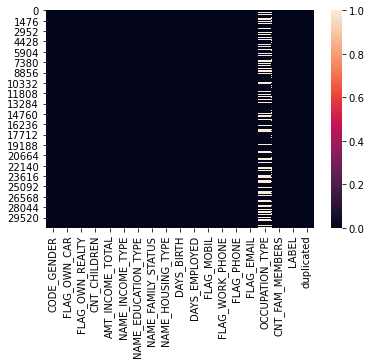

In [10]:
sns.heatmap(df.isnull())

There are nearly 30% missing values for the OCCUPATION_TYPE field in the applications dataset

There are no missing values in the records dataset

## Distributions

In [11]:
df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'LABEL',
       'duplicated'],
      dtype='object')

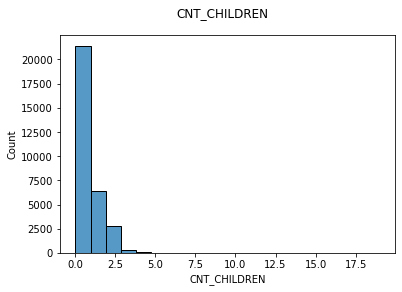

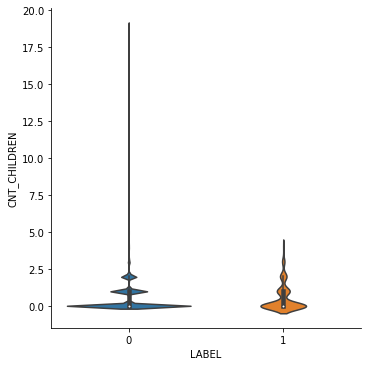

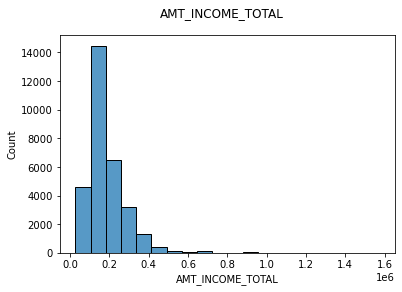

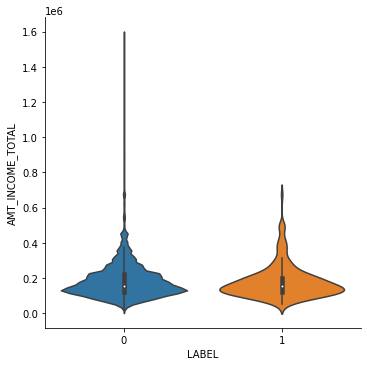

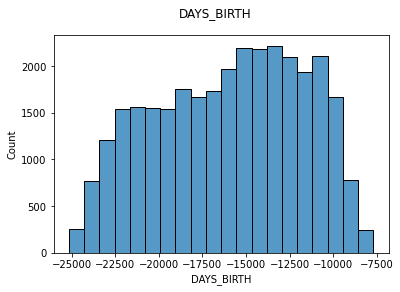

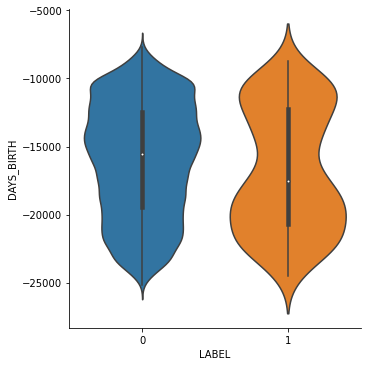

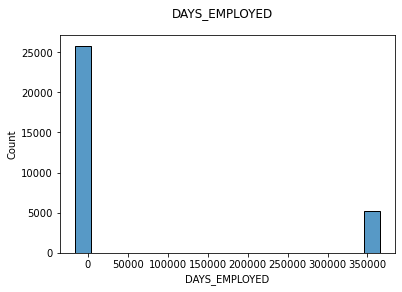

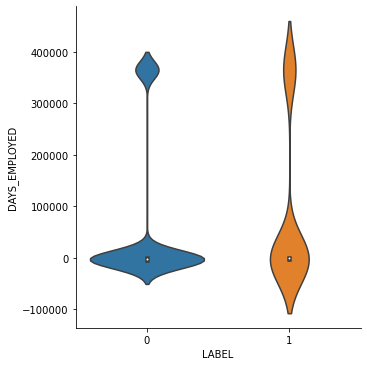

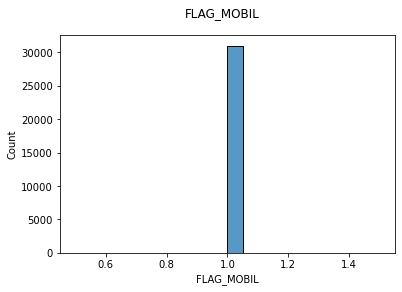

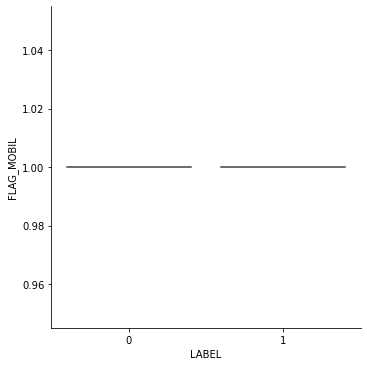

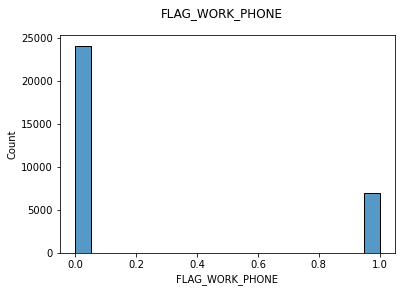

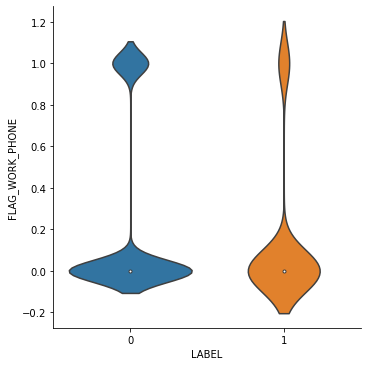

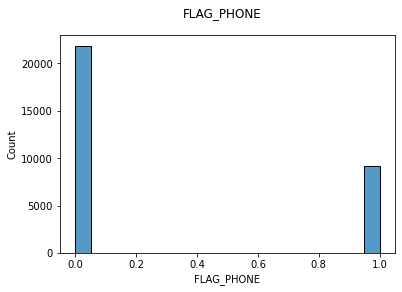

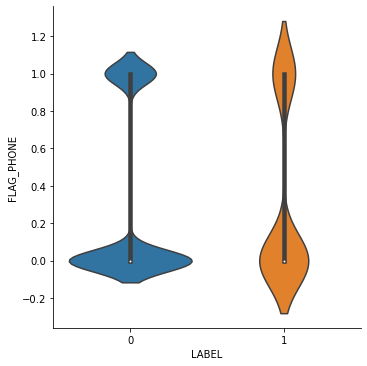

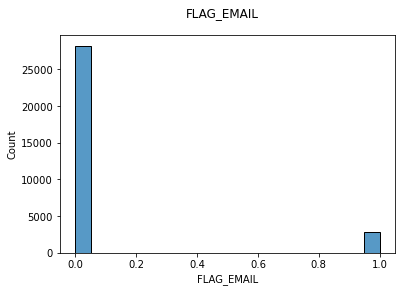

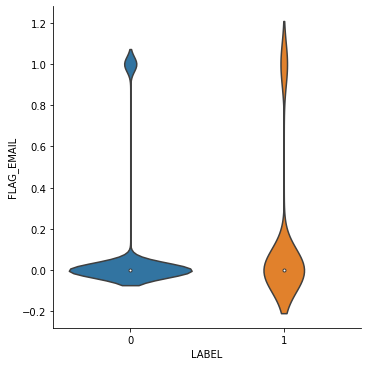

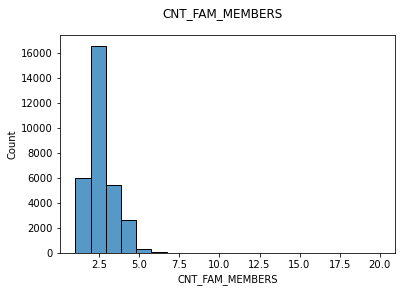

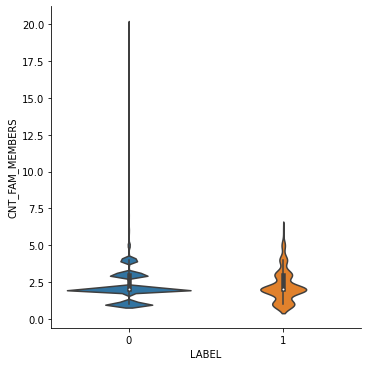

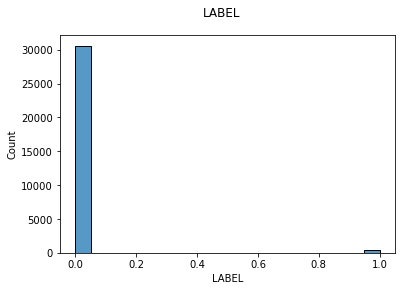

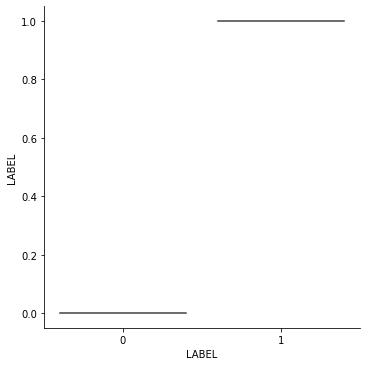

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


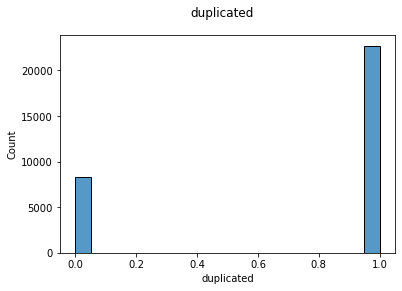

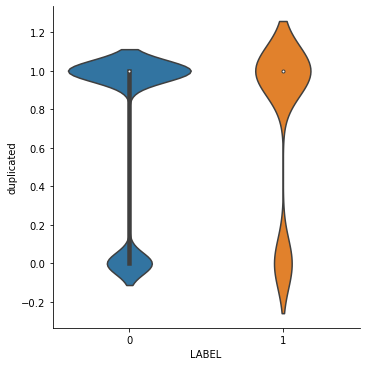

In [12]:
# Plot disctribution graphs for all numerical features
for feature in df.columns:
    if df[feature].dtype != "object" and feature != "ID":
        fig, axes = plt.subplots(1,1)
        fig.suptitle(feature)
        sns.catplot(x="LABEL", y=feature, data=df, kind="violin")
        sns.histplot(ax=axes, data=df,x=feature, bins=20)
        plt.show()

## Complementary EDA

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


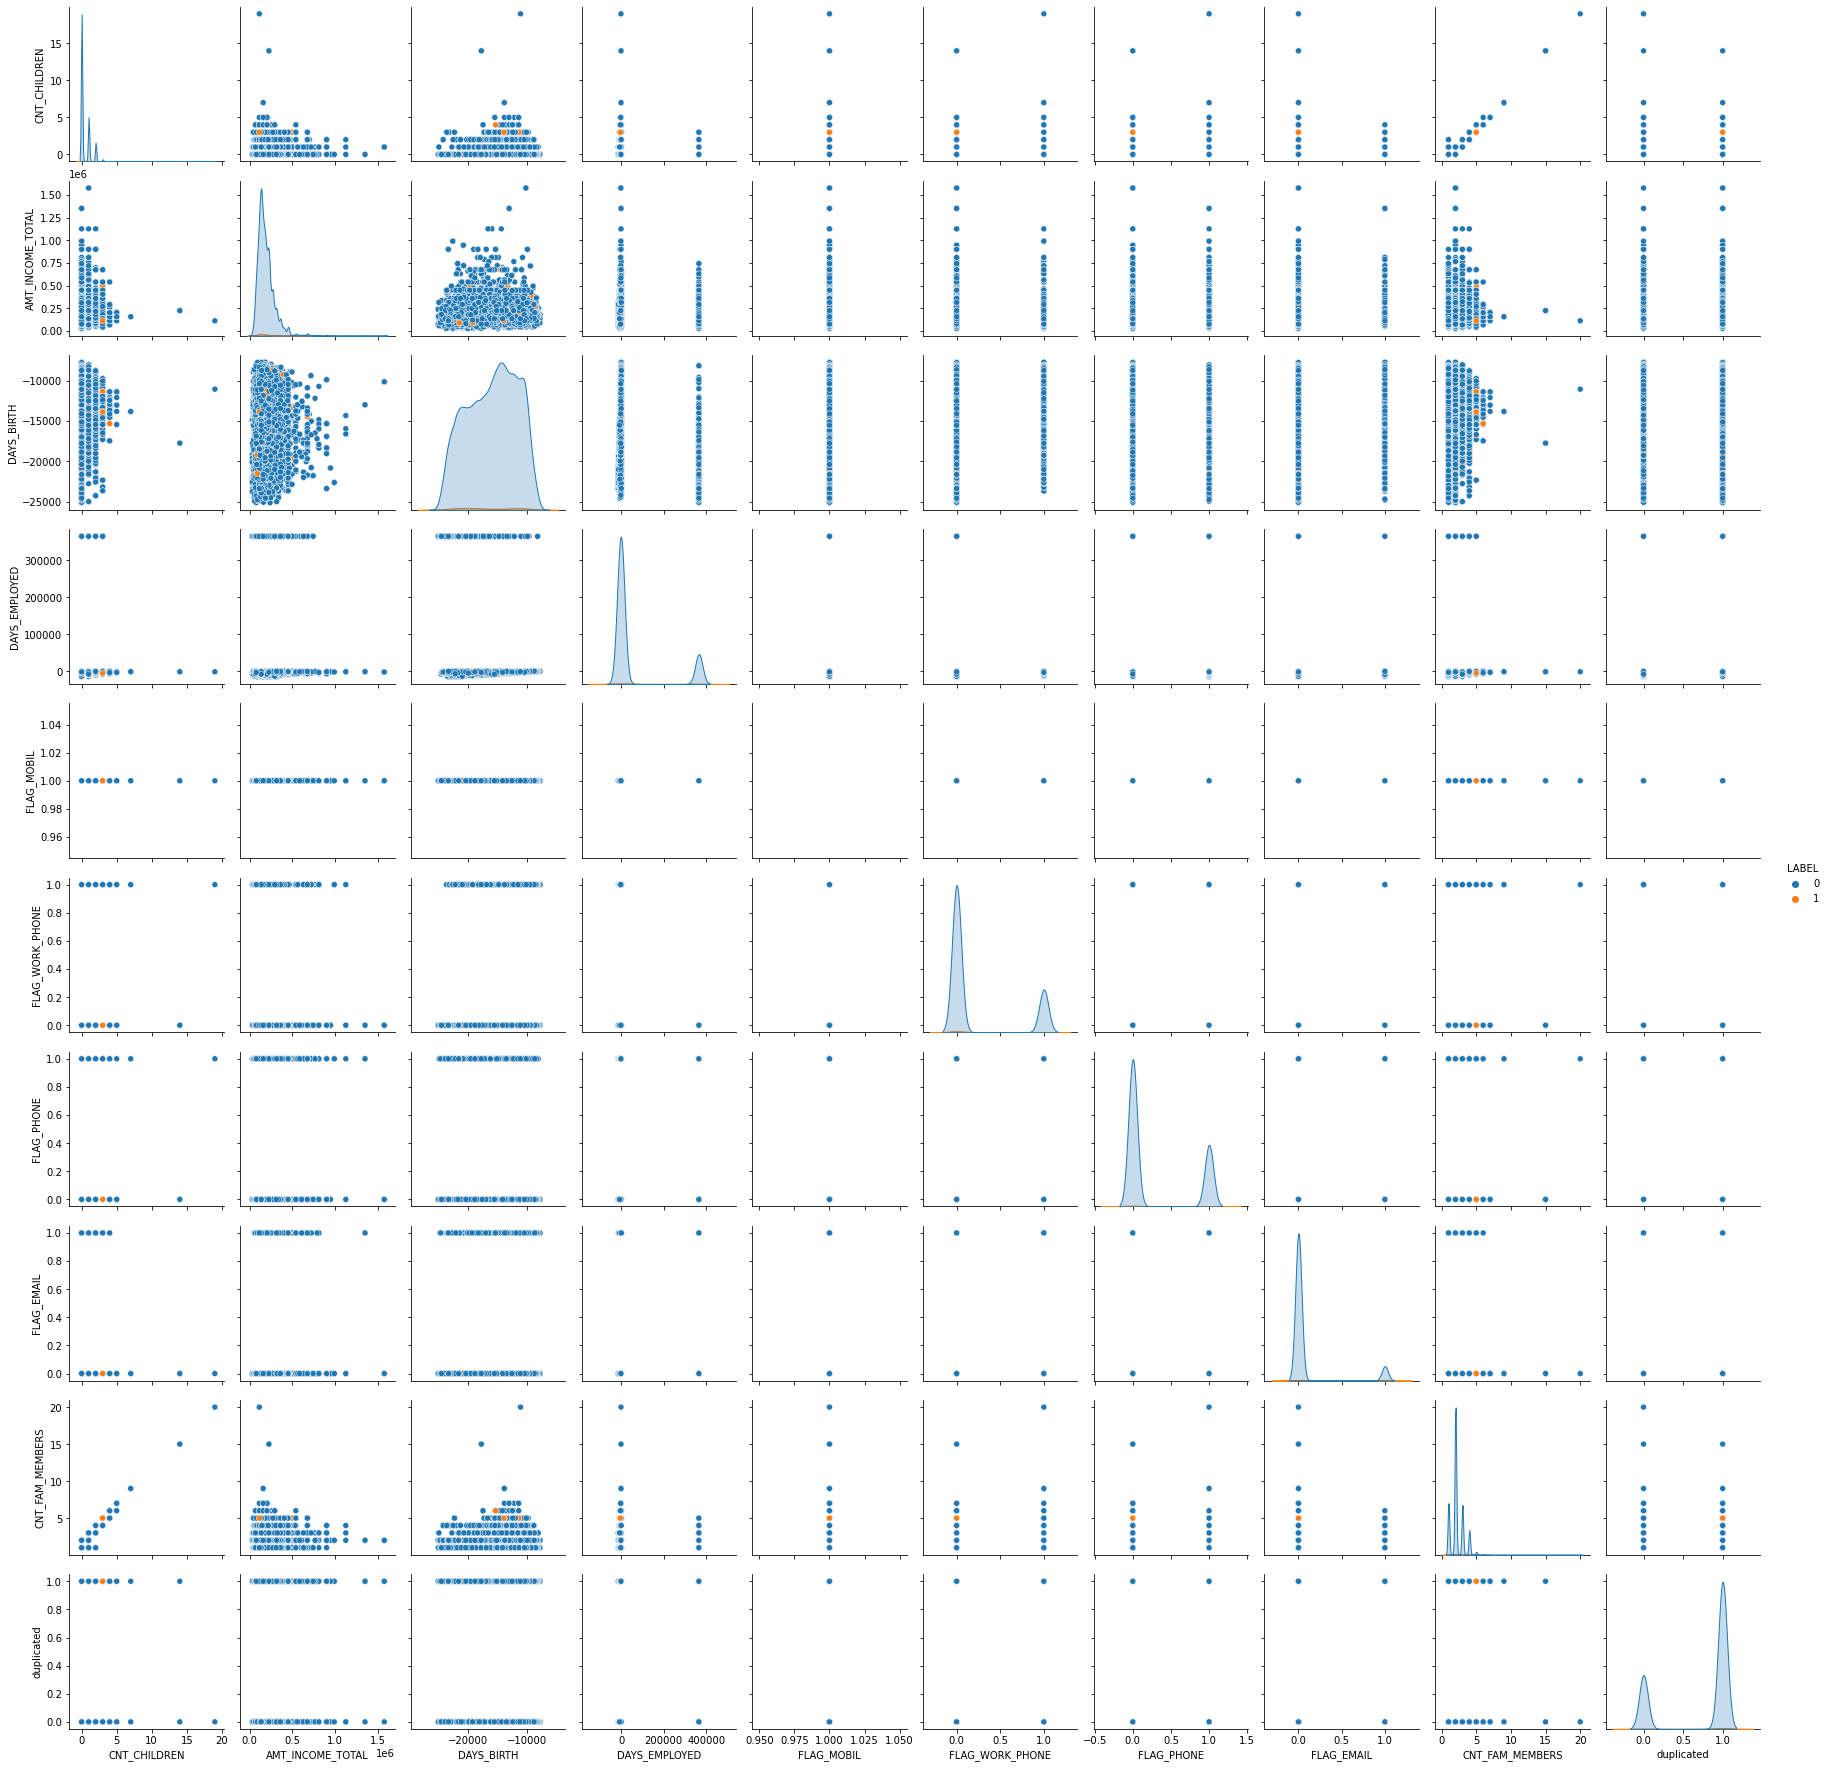

In [13]:
sns.pairplot(df, hue="LABEL")